# Introduction

*What is Classification?*

A Classification algorithm is a type Supervised Machine Learning algorithm which predicts data based on the training set provided. It is used to identify the category of various data based on the features provided.

It can be used to:
* Classify different images as cat or dog, based on different features
* Predict if a person is Covid positive or negative, based on different symptoms and tests conducted
* If a person will pass or fail in exams, based on the hours of study and the marks in practice tests
And so on...

Different types of Classificatio algorithm are:
* K-Nearest Neighbors (K-NN)
* Support Vector Machine (SVM)
* Kernel SVM
* Naive Bayes
* Logistic Regression

*About the problem...*

This problem involves classification and prediction of drugs as drugY, drugX, drugA, drugC or drugB suitable for a patient, based on Age, Sex, BP, Cholesterol levels and Na to Potassium Ratio entered by the user.

To check which algorithm is based suited to analyse the given dataset, all the different classification models are applied on the dataset and the one with best r2 score or accuracy score is selected as the best algorithm for the given dataset!

# Preparing the dataset to apply the model

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('drug200.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
print(y)

[0 3 3 4 0 4 0 3 0 0 3 0 0 0 4 0 4 1 3 0 0 0 0 0 0 0 0 4 0 0 4 2 4 0 4 4 1
 4 4 4 0 2 0 4 4 4 1 3 0 0 0 4 0 0 2 3 2 0 4 0 0 1 0 4 2 0 1 4 0 0 2 0 4 0
 0 0 1 0 1 4 2 4 3 1 3 2 4 0 0 0 0 0 0 0 0 4 0 0 0 0 1 1 3 4 0 4 4 0 2 0 1
 4 4 4 4 0 4 4 1 0 0 0 0 0 2 0 0 4 0 4 0 0 4 0 0 4 2 1 2 4 1 0 2 0 1 4 4 1
 4 3 1 2 4 4 0 3 1 0 3 4 4 2 4 0 0 0 0 4 0 1 4 4 0 0 1 0 1 0 0 0 0 4 4 0 0
 0 2 1 0 0 0 1 0 3 0 3 3 4 4 4]


As you can see, on applying label encoder, the labels in array 'y' have labels changed from strings, i.e drugX, DrugY to machine-readable form. Each have assumed values from 0 to 4 since there are 5 different classes for the drugs to be classified.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0:5,:])

[[1.0 0.0 0.0 23 'F' 'HIGH' 25.355]
 [0.0 1.0 0.0 47 'M' 'HIGH' 13.093]
 [0.0 1.0 0.0 47 'M' 'HIGH' 10.113999999999999]
 [0.0 0.0 1.0 28 'F' 'HIGH' 7.797999999999999]
 [0.0 1.0 0.0 61 'F' 'HIGH' 18.043]]


On applying OneHotEncoder(), the 'HIGH','LOW' and 'NORMAL' values in the column index 2, 'BP' got converted to machine readable form. Each value is represented as a binary vector that is all zero values except the index of the value, which is marked with a 1.

*A common question arises... Why OneHotEncoder and not LabelEncoder?*

You can figure that out by either applying both to the dataset and the one with best r2 score maybe considered final. Or, if you find that there isn't much relation between the different labels in the column, and to avoid giving weigtage to different labels based on the integer value (in Label Encoding) assigned to each, we go for One Hot Encoder. Also, if there are many labels, Label Encoder is preferred over One Hot Encoder.

In [6]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,5] = le3.fit_transform(X[:,5])
print(X[0:5,:])

[[1.0 0.0 0.0 23 0 0 25.355]
 [0.0 1.0 0.0 47 1 0 13.093]
 [0.0 1.0 0.0 47 1 0 10.113999999999999]
 [0.0 0.0 1.0 28 0 0 7.797999999999999]
 [0.0 1.0 0.0 61 0 0 18.043]]


All the columns now, are machine readable! 
So, let's go to the next step!

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
print(X_train)

[[0.0 0.0 1.0 ... 0 0 19.675]
 [1.0 0.0 0.0 ... 0 1 12.495]
 [1.0 0.0 0.0 ... 0 0 37.188]
 ...
 [0.0 0.0 1.0 ... 0 0 10.103]
 [0.0 1.0 0.0 ... 1 0 10.290999999999999]
 [0.0 0.0 1.0 ... 0 1 17.225]]


In [9]:
print(y_train)

[0 2 0 0 3 0 4 4 0 2 0 0 4 0 4 0 2 0 4 4 4 0 1 1 1 0 0 4 4 0 1 1 2 3 2 0 3
 0 2 4 4 3 0 0 3 0 0 0 0 4 3 1 0 0 0 1 4 2 4 2 0 0 0 2 0 2 0 2 4 0 0 1 0 0
 1 1 4 4 0 4 0 0 3 0 3 4 1 0 4 0 0 3 4 0 0 3 0 4 0 4 4 0 1 4 0 0 0 0 4 0 4
 2 2 0 4 1 4 2 1 1 0 0 3 4 0 4 3 4 0 0 0 4 0 1 0 4 4 1 0 2 0 1 0 0 4 4 0 4
 3 0]


In [10]:
print(X_test)

[[0.0 1.0 0.0 23 1 0 7.297999999999999]
 [0.0 0.0 1.0 28 0 0 12.879000000000001]
 [0.0 1.0 0.0 42 1 0 20.012999999999998]
 [1.0 0.0 0.0 20 1 1 35.639]
 [0.0 0.0 1.0 25 1 0 19.011]
 [0.0 1.0 0.0 20 0 1 11.686]
 [0.0 0.0 1.0 22 0 0 8.607000000000001]
 [0.0 1.0 0.0 37 0 1 12.005999999999998]
 [0.0 1.0 0.0 43 1 0 15.376]
 [0.0 0.0 1.0 55 1 1 7.261]
 [1.0 0.0 0.0 24 1 1 9.475]
 [1.0 0.0 0.0 19 0 1 25.969]
 [1.0 0.0 0.0 22 0 1 22.818]
 [0.0 1.0 0.0 37 1 1 16.724]
 [1.0 0.0 0.0 60 1 0 13.934000000000001]
 [0.0 1.0 0.0 41 1 0 11.037]
 [1.0 0.0 0.0 65 0 1 31.875999999999998]
 [0.0 0.0 1.0 70 0 0 20.489]
 [0.0 1.0 0.0 39 1 1 13.937999999999999]
 [1.0 0.0 0.0 31 1 1 17.069000000000003]
 [1.0 0.0 0.0 36 0 1 15.49]
 [0.0 0.0 1.0 61 1 0 9.443]
 [0.0 0.0 1.0 66 0 1 8.107000000000001]
 [0.0 1.0 0.0 34 0 1 12.923]
 [0.0 1.0 0.0 38 0 1 29.875]
 [0.0 0.0 1.0 36 0 0 16.753]
 [0.0 0.0 1.0 67 0 0 15.890999999999998]
 [0.0 0.0 1.0 57 0 1 25.893]
 [0.0 0.0 1.0 34 1 0 22.456]
 [0.0 0.0 1.0 50 0 1 12.295]
 [0.0

In [11]:
print(y_test)

[3 4 0 0 0 4 4 4 0 4 1 0 0 0 2 3 0 0 4 0 0 4 4 4 0 0 0 0 0 4 4 3 1 4 0 0 4
 0 1 4 0 1 0 4 0 4 0 0 1 0]


In [12]:
from xgboost import XGBClassifier 
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It is used for speed and performance!

## Feature Scaling

Scaling is done and is important for classification because the distance of the points from the classes is the main principle behind classification. The data consists of many large values, hence to normalize the range of the variables, Scaling is done. Standard scaler sets the mean of the data as 0 and the other points in terms of standard deviation.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[-0.82788481 -0.66506217  1.57745748 ... -1.05483461 -0.91064169
   0.50634019]
 [ 1.20789751 -0.66506217 -0.63393151 ... -1.05483461  1.09812675
  -0.48681098]
 [ 1.20789751 -0.66506217 -0.63393151 ... -1.05483461 -0.91064169
   2.92877146]
 ...
 [-0.82788481 -0.66506217  1.57745748 ... -1.05483461 -0.91064169
  -0.81767695]
 [-0.82788481  1.50361882 -0.63393151 ...  0.94801592 -0.91064169
  -0.79167243]
 [-0.82788481 -0.66506217  1.57745748 ... -1.05483461  1.09812675
   0.16745156]]


In [15]:
print(X_test)

[[-8.27884810e-01  1.50361882e+00 -6.33931510e-01 -1.32137829e+00
   9.48015916e-01 -9.10641693e-01 -1.20566985e+00]
 [-8.27884810e-01 -6.65062172e-01  1.57745748e+00 -1.02115602e+00
  -1.05483461e+00 -9.10641693e-01 -4.33695378e-01]
 [-8.27884810e-01  1.50361882e+00 -6.33931510e-01 -1.80533659e-01
   9.48015916e-01 -9.10641693e-01  5.53092989e-01]
 [ 1.20789751e+00 -6.65062172e-01 -6.33931510e-01 -1.50151165e+00
   9.48015916e-01  1.09812675e+00  2.71451085e+00]
 [-8.27884810e-01 -6.65062172e-01  1.57745748e+00 -1.20128938e+00
   9.48015916e-01 -9.10641693e-01  4.14494455e-01]
 [-8.27884810e-01  1.50361882e+00 -6.33931510e-01 -1.50151165e+00
  -1.05483461e+00  1.09812675e+00 -5.98713393e-01]
 [-8.27884810e-01 -6.65062172e-01  1.57745748e+00 -1.38142274e+00
  -1.05483461e+00 -9.10641693e-01 -1.02460649e+00]
 [-8.27884810e-01  1.50361882e+00 -6.33931510e-01 -4.80755930e-01
  -1.05483461e+00  1.09812675e+00 -5.54450388e-01]
 [-8.27884810e-01  1.50361882e+00 -6.33931510e-01 -1.20489205e-0

The data is now ready for various algorithms to be applied on it and predict the results. The classification models are available in sklearn library.

# K-Nearest Neighbors (K-NN)

## Training the K-NN model on the Training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [4 4]
 [0 0]
 [0 0]
 [0 0]
 [0 4]
 [4 4]
 [4 4]
 [3 0]
 [4 4]
 [1 1]
 [0 0]
 [0 0]
 [4 0]
 [2 2]
 [3 3]
 [0 0]
 [4 0]
 [4 4]
 [1 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [0 0]
 [4 0]
 [4 0]
 [0 0]
 [0 0]
 [0 4]
 [4 4]
 [3 3]
 [1 1]
 [4 4]
 [0 0]
 [2 0]
 [4 4]
 [0 0]
 [0 1]
 [4 4]
 [1 0]
 [1 1]
 [0 0]
 [4 4]
 [0 0]
 [4 4]
 [4 0]
 [4 0]
 [0 1]
 [2 0]]


## Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  2  2  1  6]
 [ 2  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 14]]


0.7

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09146341463414653

K-NN model predicts the data with an r2 score of **9.14%**

# Support Vector Machine (SVM)

## Training the SVM model on the Training set

In [20]:
from sklearn.svm import SVC
classifier = SVC();
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [4 4]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [3 0]
 [4 4]
 [1 1]
 [0 0]
 [0 0]
 [4 0]
 [2 2]
 [3 3]
 [0 0]
 [0 0]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [0 0]
 [4 0]
 [4 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [3 3]
 [1 1]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [0 0]
 [1 1]
 [4 4]
 [0 0]
 [1 1]
 [0 0]
 [4 4]
 [0 0]
 [4 4]
 [4 0]
 [0 0]
 [1 1]
 [2 0]]


## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  0  1  1  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]


0.88

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5304878048780488

SVM model predicts the data with an r2 score of **53.04%**

Way better than the last but not at all sufficient...

# Kernel SVM

## Training the Kernel SVM model on the Training set

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [25]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [4 4]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [3 0]
 [4 4]
 [1 1]
 [0 0]
 [0 0]
 [4 0]
 [2 2]
 [3 3]
 [0 0]
 [0 0]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [0 0]
 [4 0]
 [4 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [3 3]
 [1 1]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [0 0]
 [1 1]
 [4 4]
 [0 0]
 [1 1]
 [0 0]
 [4 4]
 [0 0]
 [4 4]
 [4 0]
 [0 0]
 [1 1]
 [2 0]]


## Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  0  1  1  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]


0.88

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5304878048780488

Kernel SVM model predicts the data with an r2 score of **53.04%**

Same as the last...

# Naive Bayes

## Training the Naive Bayes model on the Training set

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test set results

In [29]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [4 4]
 [3 0]
 [0 0]
 [4 0]
 [4 4]
 [4 4]
 [4 4]
 [3 0]
 [4 4]
 [1 1]
 [1 0]
 [1 0]
 [4 0]
 [2 2]
 [3 3]
 [0 0]
 [4 0]
 [4 4]
 [1 0]
 [1 0]
 [4 4]
 [4 4]
 [4 4]
 [0 0]
 [4 0]
 [4 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [3 3]
 [1 1]
 [4 4]
 [0 0]
 [2 0]
 [4 4]
 [3 0]
 [1 1]
 [4 4]
 [1 0]
 [1 1]
 [0 0]
 [4 4]
 [0 0]
 [4 4]
 [4 0]
 [0 0]
 [1 1]
 [2 0]]


## Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9  5  2  3  6]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]


0.68

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.17073170731707332

Naive Bayes model predicts the data with an r2 score of **17.07%**

The predictions of the models till now were ok-ish... Let's have a look at Logistic Regression!

# Logistic Regression

*What is Logic Regression?*

Logistic Regression is a type of classification method. It is used to model and predict the probability of a class or an event. 


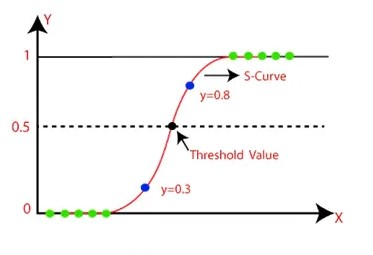

Basically, the probabilty of accurance of an event is plotted. The values of probability above the threshold, (eg:0.8) form a part of the event 1 and the values below the threshold form a part of event or class 0

## Training the Logistic Regression model on the Training set

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The class LogisticRegression() from the sklearn library is applied for training the model

## Predicting the Test set results

In [33]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [4 4]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [0 0]
 [4 4]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [0 0]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [3 3]
 [1 1]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [0 0]
 [1 1]
 [4 4]
 [0 0]
 [1 1]
 [0 0]
 [4 4]
 [0 0]
 [4 4]
 [0 0]
 [0 0]
 [1 1]
 [2 0]]


## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[24  0  1  0  0]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]


0.98

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.975609756097561

The Logistic Regression model predicts the data with an r2 score of **97.56%**

Which is a lot better than the other models and hence is best suited for this dataset!

## Computing the acciracy with k-fold cross validation

In [36]:
# 10 parts, mean
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.00 %
Standard Deviation: 6.96 %


In [37]:
accuracies

array([0.93333333, 0.93333333, 0.8       , 1.        , 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

## Predicting a single result

In [38]:
data=[]
#Age	Sex	BP	Cholesterol	Na_to_K
#Eg: 23	F	HIGH	HIGH	25.355 =>> DrugY
data.append(int(input("Enter Age:")))
data.append(input("Enter Sex:"))
data.append(input("Enter BP:"))
data.append(input("Enter Cholesterol:"))
data.append(float(input("Enter Na_to_K:")))

Enter Age:23
Enter Sex:F
Enter BP:HIGH
Enter Cholesterol:HIGH
Enter Na_to_K:25.355


In [39]:
print(le.inverse_transform(classifier.predict(sc.transform(ct.transform([[data[0],le2.transform([[data[1]]]),data[2],le3.transform([[data[3]]]),data[4]]])))))
#23	F	HIGH	HIGH	25.355 =>> DrugY

['DrugY']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* The results predicted by the Logistic Regression model have been the most accurate with an r2 score of 97.56%

* Thd accuracy score is quite great also high and it has to be this high in the fields like medical. 

* According to the confusion matrix, the model just predicts one data wrong else is quite successful in its predictions!

Thus the best model that could be used to predict the drugs based on the features similar to the given features, is the Logistic Regression algorithm